<a href="https://colab.research.google.com/github/shahdelmasry12/AI-and-Data-Science-projects/blob/main/final_project_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Student_performance.csv')

In [ ]:
df = df.drop(['race_ethnicity' , 'parental_level_of_education' , 'roll_no' ], axis = 1)

In [ ]:
df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,male,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,male,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,male,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,male,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,male,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [ ]:
#### GENDER SECTION ####

In [ ]:
genderUniqueValues = df['gender'].unique() # to check values in the column
genderUniqueValues

array(['male', nan, 'Boy', '\\tmale', 'female', 'Girl'], dtype=object)

In [ ]:
firstHalfGender = df.iloc[0:5000 , :1] # to choose first 5000 rows

In [ ]:
firstHalfGender['gender'] = firstHalfGender['gender'].replace({'Boy': 'male', '\\tmale': 'male' }) # replace trash values

In [ ]:
tmp = firstHalfGender
tmp["gender"] = tmp["gender"].fillna('male') #to fill nan values
firstHalfGender = tmp # return to the variable

In [ ]:
secondHalfGender = df.iloc[5000:10000 , :1] # to choose from 5000 to 10000

In [ ]:
secondHalfGender['gender'] = secondHalfGender['gender'].replace({'Girl': 'female'}) # replace trash values

In [ ]:
tmp = 0
tmp = secondHalfGender
tmp["gender"] = tmp["gender"].fillna('female') #to fill nan values
secondHalfGender = tmp # return to the variable

In [ ]:
frames = [firstHalfGender, secondHalfGender] # to concat the first and second gender rows
finalGender = pd.concat(frames, ignore_index=True) # concat

In [ ]:
df['gender'] = finalGender # to change gender to the final one in data frame

In [ ]:
#### LUNCH SECTION ####

In [ ]:
checkUnique = df['lunch'].unique() # to check values in the column
checkUnique

array([ 1.,  0., nan])

In [ ]:
modeForLunch= df['lunch'].mode() # to calc mode in lunch (mode = the most repeateted value)
modeForLunch

0    1.0
Name: lunch, dtype: float64

In [ ]:
tmp = df.iloc[:, 1:2]   # to take lunch column to work on it
tmp.loc[:, "lunch"] = tmp["lunch"].fillna(1.0)  # use .loc to fill NaN values
df['lunch'] = tmp['lunch']  # assign the "lunch" column to df

In [ ]:
df['lunch'] = df['lunch'].astype(int) # to change data type to int instead of float

In [ ]:
checkUnique = df['lunch'].unique() # to check values in the column
checkUnique

array([1, 0])

In [ ]:
#### test_preparation_course SECTION ####

In [ ]:
checkUnique = df['test_preparation_course'].unique() # to check values in the column
checkUnique

array([ 1.,  0., nan])

In [ ]:
modeForTest= df['test_preparation_course'].mode() # to calc mode in test_preparation_course (mode = the most repeateted value)
modeForTest

0    0.0
Name: test_preparation_course, dtype: float64

In [ ]:
tmp = df.iloc[:, 2:3]   # to take test_preparation_course column to work on it
tmp.loc[:, "test_preparation_course"] = tmp["test_preparation_course"].fillna(0.0)  # use .loc to fill NaN values
df['test_preparation_course'] = tmp['test_preparation_course']  # assign the "test_preparation_course" column to df

In [ ]:
df['test_preparation_course'] = df['test_preparation_course'].astype(int) # to change data type to int instead of float

In [ ]:
checkUnique = df['test_preparation_course'].unique() # to check values in the column
checkUnique

array([1, 0])

In [ ]:
#### math_score section ####

In [ ]:
checkUnique = df['math_score'].unique() # to check values in the column
checkUnique

array(['89', '65', '10', '22', '26', '40', '34', '25', '28', '71', '55',
       nan, '29', '18', '72', '23', '35', '38', '41', '44', '39', '85',
       '30', '100', '61', '47', '37', '49', '11', '32', '78', '36', '68',
       '97', '64', '60', '69', '87', '83', '42', '52', '27', '46', '12',
       '51', '75', '20', '81', '98', '24', '82', '19', '48', '74', '43',
       '62', '21', '93', '66', '0', '13', '45', '57', '54', '70', '50',
       '73', '88', '33', '76', '17', '16', '56', '80', '53', '14', '84',
       '58', '9', '8', '79', '77', '99', '67', '59', '63', '86', '31',
       '92', '94', '6', '91', '96', '95', '15', '90', '7', '4', '\\t41',
       '5'], dtype=object)

In [ ]:
# \\t41  حذف القيم  الغير مرغوبة فيهاا مثل مسافات اوسلاش او مثل
df["math_score"] = df["math_score"].str.strip()

In [ ]:
#NaNتحويل القيم الي نوع ارقام والقيم الغير قابله للتحويل نحولها  الي
df["math_score"] = pd.to_numeric(df["math_score"], errors="coerce")

In [ ]:
#  NaNنبدل بدل 0 ب
df["math_score"] = df["math_score"].replace(0, pd.NA)
# نجيب الوسيط
median_value = df["math_score"].median()
#نبدل القيم الفارغه بالوسيط
df.loc[: , "math_score"] = df["math_score"].fillna(median_value)

df.head()


C:\Users\mohab\AppData\Local\Temp\ipykernel_2320\2758084934.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[: , "math_score"] = df["math_score"].fillna(median_value)


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,C
1,male,1,0,65.0,100.0,67.0,96.0,328.0,A
2,male,1,0,10.0,99.0,97.0,58.0,264.0,B
3,male,1,1,22.0,51.0,41.0,84.0,198.0,D
4,male,0,1,26.0,58.0,64.0,65.0,213.0,C


In [ ]:
checkUnique = df['math_score'].unique() # to check values in the column
checkUnique

array([89.0, 65.0, 10.0, 22.0, 26.0, 40.0, 34.0, 25.0, 28.0, 71.0, 55.0,
       58.0, 29.0, 18.0, 72.0, 23.0, 35.0, 38.0, 41.0, 44.0, 39.0, 85.0,
       30.0, 100.0, 61.0, 47.0, 37.0, 49.0, 11.0, 32.0, 78.0, 36.0, 68.0,
       97.0, 64.0, 60.0, 69.0, 87.0, 83.0, 42.0, 52.0, 27.0, 46.0, 12.0,
       51.0, 75.0, 20.0, 81.0, 98.0, 24.0, 82.0, 19.0, 48.0, 74.0, 43.0,
       62.0, 21.0, 93.0, 66.0, 13.0, 45.0, 57.0, 54.0, 70.0, 50.0, 73.0,
       88.0, 33.0, 76.0, 17.0, 16.0, 56.0, 80.0, 53.0, 14.0, 84.0, 9.0,
       8.0, 79.0, 77.0, 99.0, 67.0, 59.0, 63.0, 86.0, 31.0, 92.0, 94.0,
       6.0, 91.0, 96.0, 95.0, 15.0, 90.0, 7.0, 4.0, 5.0], dtype=object)

In [ ]:
#### reading_score section ####

In [ ]:
checkUnique = df['reading_score'].unique() # to check values in the column
checkUnique

array([ 38., 100.,  99.,  51.,  58.,  49.,  48.,  80.,  79.,  22.,  64.,
        53.,  nan,  70.,  97.,  96.,  82.,  76.,  73.,  68.,  71.,  63.,
        57.,  54.,  89.,  69.,  67.,  77.,  66.,  92.,  81.,  43.,  56.,
        90.,  98.,  55.,  91.,  83.,  86.,  88.,  40.,  62.,  30.,  60.,
        65.,  85.,  37.,  78.,  84.,  74.,  95.,  47.,  59.,  44.,  72.,
        17.,  34.,  87.,  93.,  41.,  36.,  75.,  50.,  52.,  46.,  45.,
        39.,  94.,  61.,  35.,  33.,  31.,  26.,  42.,  24.,  21.,  25.,
        23.,  27.,  20.,  32.,  19.,  28.,  18.,  29.])

In [ ]:
#  NaNنبدل بدل 0 ب
df["reading_score"] = df["reading_score"].replace(0, pd.NA)
#الوسيط
median_value = df["reading_score"].median()
#نبدل القيم الفارغه بالوسيط
df.loc[: , "reading_score"] = df["reading_score"].fillna(median_value)

df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,C
1,male,1,0,65.0,100.0,67.0,96.0,328.0,A
2,male,1,0,10.0,99.0,97.0,58.0,264.0,B
3,male,1,1,22.0,51.0,41.0,84.0,198.0,D
4,male,0,1,26.0,58.0,64.0,65.0,213.0,C


In [ ]:
checkUnique = df['reading_score'].unique() # to check values in the column
checkUnique

array([ 38., 100.,  99.,  51.,  58.,  49.,  48.,  80.,  79.,  22.,  64.,
        53.,  71.,  70.,  97.,  96.,  82.,  76.,  73.,  68.,  63.,  57.,
        54.,  89.,  69.,  67.,  77.,  66.,  92.,  81.,  43.,  56.,  90.,
        98.,  55.,  91.,  83.,  86.,  88.,  40.,  62.,  30.,  60.,  65.,
        85.,  37.,  78.,  84.,  74.,  95.,  47.,  59.,  44.,  72.,  17.,
        34.,  87.,  93.,  41.,  36.,  75.,  50.,  52.,  46.,  45.,  39.,
        94.,  61.,  35.,  33.,  31.,  26.,  42.,  24.,  21.,  25.,  23.,
        27.,  20.,  32.,  19.,  28.,  18.,  29.])

In [ ]:
#### writing_score section ####

In [ ]:
checkUnique = df['writing_score'].unique() # to check values in the column
checkUnique

array([ 85.,  67.,  97.,  41.,  64.,  69.,  84.,  34., 100.,  87.,  54.,
        76.,  nan,  52.,  82.,  78.,  50.,  62.,  49.,  43.,  63.,  74.,
        81.,  98.,  57.,  61.,  60.,  86.,  55.,  95.,  33.,  53.,  48.,
        59.,  73.,  30.,  77.,  80.,  32.,  56.,  68.,  65.,  25.,  44.,
        26.,  58.,  45.,  83.,  18.,  23.,  96.,  71.,  93.,  37.,  40.,
        72.,  29.,  51.,  27.,  92.,  79.,  75.,  88.,  31.,  99.,  47.,
        94.,  66.,  36.,  70.,  46.,  89.,  42.,  10.,  91.,  90.,  16.,
        38.,  28.,  39.,  35.,  15.,  24.,  20.,  11.,  12.,  22.,  17.,
        19.,  13.,  21.,  14.])

In [ ]:
#  NaNنبدل بدل 0 ب
df["writing_score"] = df["writing_score"].replace(0, pd.NA)

median_value = df["writing_score"].median()# get the median
#نبدل القيم الفارغه بالوسيط
df.loc[: , "writing_score"] = df["writing_score"].fillna(median_value)

df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,C
1,male,1,0,65.0,100.0,67.0,96.0,328.0,A
2,male,1,0,10.0,99.0,97.0,58.0,264.0,B
3,male,1,1,22.0,51.0,41.0,84.0,198.0,D
4,male,0,1,26.0,58.0,64.0,65.0,213.0,C


In [ ]:
checkUnique = df['writing_score'].unique() # to check values in the column
checkUnique

array([ 85. ,  67. ,  97. ,  41. ,  64. ,  69. ,  84. ,  34. , 100. ,
        87. ,  54. ,  76. ,  72.5,  52. ,  82. ,  78. ,  50. ,  62. ,
        49. ,  43. ,  63. ,  74. ,  81. ,  98. ,  57. ,  61. ,  60. ,
        86. ,  55. ,  95. ,  33. ,  53. ,  48. ,  59. ,  73. ,  30. ,
        77. ,  80. ,  32. ,  56. ,  68. ,  65. ,  25. ,  44. ,  26. ,
        58. ,  45. ,  83. ,  18. ,  23. ,  96. ,  71. ,  93. ,  37. ,
        40. ,  72. ,  29. ,  51. ,  27. ,  92. ,  79. ,  75. ,  88. ,
        31. ,  99. ,  47. ,  94. ,  66. ,  36. ,  70. ,  46. ,  89. ,
        42. ,  10. ,  91. ,  90. ,  16. ,  38. ,  28. ,  39. ,  35. ,
        15. ,  24. ,  20. ,  11. ,  12. ,  22. ,  17. ,  19. ,  13. ,
        21. ,  14. ])

In [ ]:
#### science_score section ####

In [ ]:
checkUnique = df['science_score'].unique() # to check values in the column
checkUnique

array([ 26.,  96.,  58.,  84.,  65.,  48.,  73.,  17.,  76.,  39.,  60.,
        55.,  91.,  45.,  nan,  54.,  75.,  47.,  78.,  57.,   9.,  95.,
        44.,  46.,  82.,  81.,  31.,  70.,  71.,  93.,  99.,  66.,  62.,
        50.,  67.,  94.,  28.,  38.,  69.,  63.,  61.,  79.,  72., 100.,
        51.,  74.,  52.,  56.,  33.,  36.,  90.,  53.,  88.,  59.,  27.,
        23.,  15.,  10.,  42.,  77.,  83.,  80.,  49.,  40.,  43.,  64.,
        97.,  86.,  25.,  41.,  34.,  89.,  32.,  87.,  98.,  92.,  85.,
        35.,  68.,  30.,  29.,  13.,  37.,  11.,  12.,  18.,  22.,  14.,
        21.,  24.,  19.,  20.,  16.])

In [ ]:
#  NaNنبدل بدل 0 ب
df["science_score"] = df["science_score"].replace(0, pd.NA)
median_value = df["science_score"].median()
#نبدل القيم الفارغه بالوسيط
df.loc[: , "science_score"] = df["science_score"].fillna(median_value)

df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,C
1,male,1,0,65.0,100.0,67.0,96.0,328.0,A
2,male,1,0,10.0,99.0,97.0,58.0,264.0,B
3,male,1,1,22.0,51.0,41.0,84.0,198.0,D
4,male,0,1,26.0,58.0,64.0,65.0,213.0,C


In [ ]:
checkUnique = df['science_score'].unique() # to check values in the column
checkUnique

array([ 26.,  96.,  58.,  84.,  65.,  48.,  73.,  17.,  76.,  39.,  60.,
        55.,  91.,  45.,  67.,  54.,  75.,  47.,  78.,  57.,   9.,  95.,
        44.,  46.,  82.,  81.,  31.,  70.,  71.,  93.,  99.,  66.,  62.,
        50.,  94.,  28.,  38.,  69.,  63.,  61.,  79.,  72., 100.,  51.,
        74.,  52.,  56.,  33.,  36.,  90.,  53.,  88.,  59.,  27.,  23.,
        15.,  10.,  42.,  77.,  83.,  80.,  49.,  40.,  43.,  64.,  97.,
        86.,  25.,  41.,  34.,  89.,  32.,  87.,  98.,  92.,  85.,  35.,
        68.,  30.,  29.,  13.,  37.,  11.,  12.,  18.,  22.,  14.,  21.,
        24.,  19.,  20.,  16.])

In [ ]:
#### total_score section ####

In [ ]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]+df["science_score"] #get total_score value
df.head()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,C
1,male,1,0,65.0,100.0,67.0,96.0,328.0,A
2,male,1,0,10.0,99.0,97.0,58.0,264.0,B
3,male,1,1,22.0,51.0,41.0,84.0,198.0,D
4,male,0,1,26.0,58.0,64.0,65.0,213.0,C


In [ ]:
checkUnique = df['total_score'].unique() # to check values in the column
checkUnique

array([238.0, 328.0, 264.0, 198.0, 213.0, 206.0, 239.0, 156.0, 283.0,
       217.0, 266.0, 220.0, 267.0, 205.5, 288.0, 207.0, 275.0, 262.0,
       242.5, 212.0, 242.0, 237.0, 282.0, 165.0, 307.0, 250.0, 240.0,
       233.0, 306.0, 178.0, 169.0, 280.0, 247.0, 292.0, 256.0, 319.0,
       316.0, 252.0, 215.0, 301.0, 313.5, 203.0, 261.0, 241.0, 311.0,
       253.0, 278.5, 257.0, 226.0, 298.0, 248.0, 236.0, 232.0, 284.0,
       270.0, 313.0, 230.0, 369.0, 221.0, 302.0, 268.0, 249.0, 210.0,
       176.0, 285.0, 246.0, 182.0, 304.0, 229.0, 231.0, 255.0, 305.0,
       243.0, 287.0, 188.0, 251.0, 208.0, 327.0, 340.0, 191.0, 218.0,
       273.0, 224.0, 314.0, 197.0, 225.0, 321.0, 228.0, 300.0, 172.0,
       234.0, 335.0, 320.0, 324.0, 166.0, 317.0, 294.0, 140.0, 274.0,
       352.0, 281.0, 310.0, 265.0, 192.0, 183.0, 194.0, 204.0, 308.0,
       258.0, 309.0, 297.0, 281.5, 278.0, 195.0, 199.0, 269.0, 190.0,
       322.0, 142.0, 257.5, 235.0, 276.0, 303.0, 201.0, 272.0, 254.0,
       196.0, 260.0,

In [ ]:
#### presentage section ####

In [ ]:
df["Percentage"]=(df["total_score"]/400)*100  #add columns Percentage & get it's values

In [ ]:
# listحولنا اسماء الاعمده لقائمه
columns = list(df.columns)
# total_score  بجانب العمود  Percentage لنقل العمودpop استخدمنا دالة
#  بدلنا المواقع index("Percentage") لنحدد موقعه ونضيف  قبله index("grade")استخدمنا

columns.insert(columns.index("grade"), columns.pop(columns.index("Percentage")))
df = df[columns]

df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,Percentage,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,59.5,C
1,male,1,0,65.0,100.0,67.0,96.0,328.0,82.0,A
2,male,1,0,10.0,99.0,97.0,58.0,264.0,66.0,B
3,male,1,1,22.0,51.0,41.0,84.0,198.0,49.5,D
4,male,0,1,26.0,58.0,64.0,65.0,213.0,53.25,C


In [ ]:
#### grade section ####

In [ ]:
grades = [] #  gradeوضع قيم للعمود

for i in df['Percentage']:
    if i <=100 and i>=95:
        grades.append('A+')
    elif i<95 and i>=90:
        grades.append('A')
    elif i<90 and i>=85:
        grades.append('A-')
    elif i<85 and i>=80:
        grades.append('B+')
    elif i<80 and i>=75:
        grades.append('B')
    elif i<75 and i>=70:
        grades.append('C+')
    elif i<70 and i>=65:
        grades.append('C')
    elif i<65 and i>=60:
        grades.append('D+')
    elif i<60 and i>=55:
        grades.append('D')
    elif i<55 and i>=50:
        grades.append('D-')
    else:
        grades.append('F')

df['grade'] = grades

In [ ]:
df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,Percentage,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,59.5,D
1,male,1,0,65.0,100.0,67.0,96.0,328.0,82.0,B+
2,male,1,0,10.0,99.0,97.0,58.0,264.0,66.0,C
3,male,1,1,22.0,51.0,41.0,84.0,198.0,49.5,F
4,male,0,1,26.0,58.0,64.0,65.0,213.0,53.25,D-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   10000 non-null  object 
 1   lunch                    10000 non-null  int32  
 2   test_preparation_course  10000 non-null  int32  
 3   math_score               10000 non-null  object 
 4   reading_score            10000 non-null  float64
 5   writing_score            10000 non-null  float64
 6   science_score            10000 non-null  float64
 7   total_score              10000 non-null  object 
 8   Percentage               10000 non-null  object 
 9   grade                    10000 non-null  object 
dtypes: float64(3), int32(2), object(5)
memory usage: 703.3+ KB


In [ ]:
df

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,Percentage,grade
0,male,1,1,89.0,38.0,85.0,26.0,238.0,59.5,D
1,male,1,0,65.0,100.0,67.0,96.0,328.0,82.0,B+
2,male,1,0,10.0,99.0,97.0,58.0,264.0,66.0,C
3,male,1,1,22.0,51.0,41.0,84.0,198.0,49.5,F
4,male,0,1,26.0,58.0,64.0,65.0,213.0,53.25,D-
...,...,...,...,...,...,...,...,...,...,...
9995,female,1,0,78.0,60.0,46.0,58.0,242.0,60.5,D+
9996,female,1,0,37.0,92.0,99.0,73.0,301.0,75.25,B
9997,female,1,1,70.0,71.0,100.0,90.0,331.0,82.75,B+
9998,female,1,0,87.0,60.0,100.0,89.0,336.0,84.0,B+


In [ ]:
# visulaization#


In [ ]:
genderRelation = df.groupby('gender')['total_score'].sum()

<Axes: title={'center': 'male vs female / total score'}, xlabel='gender', ylabel='total score'>

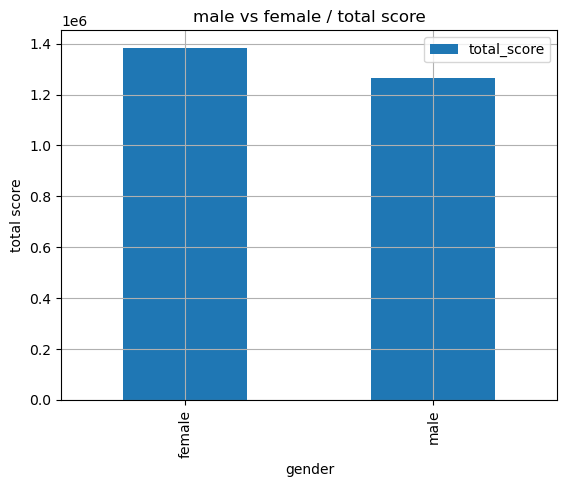

In [ ]:
genderRelation.plot(kind = 'bar',title = 'male vs female / total score', xlabel = 'gender' , ylabel = 'total score' , grid = True , legend = True )

In [ ]:
lunchRelation = df.groupby('lunch')['total_score'].sum()

<Axes: title={'center': 'lunch / total score'}, xlabel='had lunch', ylabel='total score'>

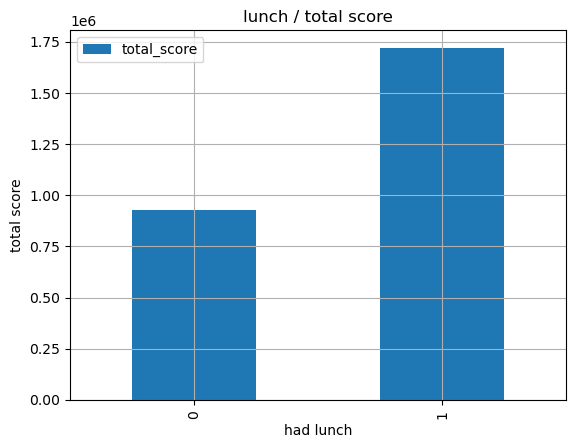

In [ ]:
lunchRelation.plot(kind = 'bar',title = 'lunch / total score', xlabel = 'had lunch' , ylabel = 'total score' , grid = True , legend = True)

In [ ]:
courseRelation = df.groupby('test_preparation_course')['total_score'].sum()

<Axes: title={'center': 'test preparation course/ total score'}, xlabel='attendance', ylabel='total score'>

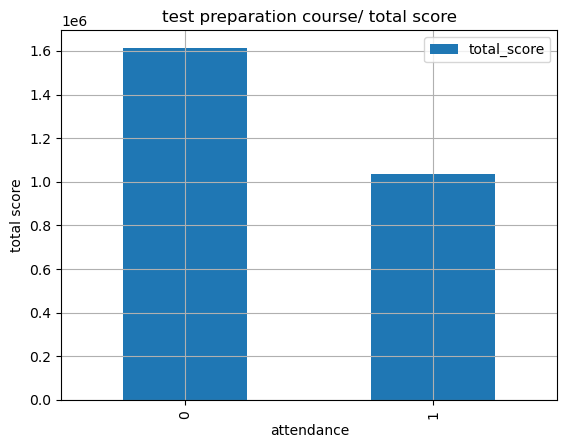

In [ ]:
courseRelation.plot(kind = 'bar',title = 'test preparation course/ total score', xlabel = 'attendance' , ylabel = 'total score' , grid = True , legend = True)

In [ ]:
pieRelation = df.groupby('grade')['Percentage'].sum()


C:\Users\mohab\AppData\Local\Temp\ipykernel_2320\4212672367.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pieRelation.plot(kind = 'pie', y = 'Percentage' , autopct= '%1.2f%%' , figsize = (10,10))


<Axes: ylabel='Percentage'>

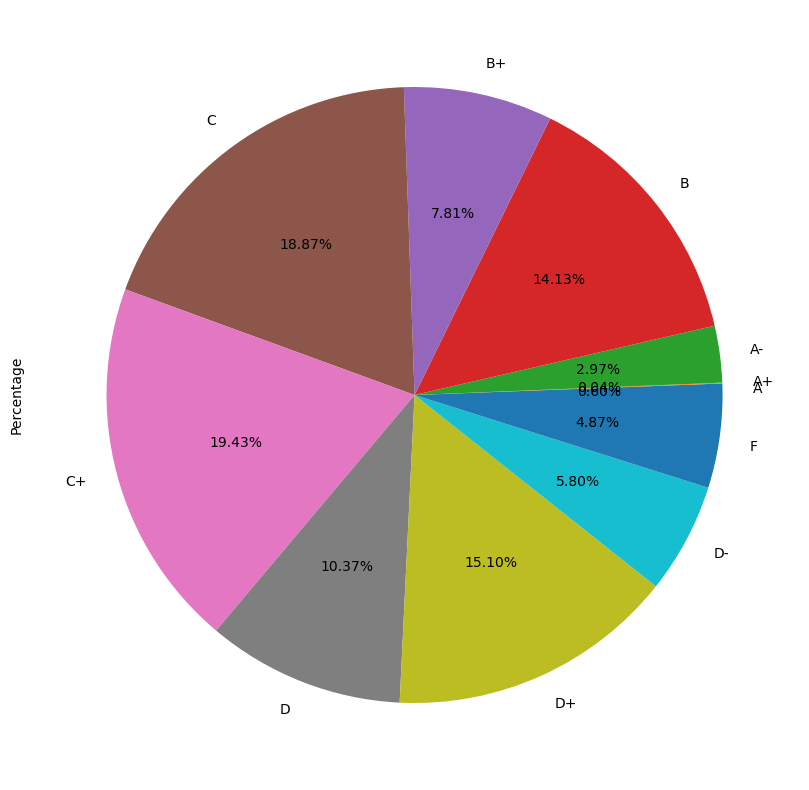

In [ ]:
pieRelation.plot(kind = 'pie', y = 'Percentage' , autopct= '%1.2f%%' , figsize = (10,10))

In [ ]:
df2 = df

In [ ]:
df2 = df2.drop([  'lunch' , 'test_preparation_course' ,'total_score', 'Percentage' ,'grade' ], axis = 1)
df2

,gender,math_score,reading_score,writing_score,science_score
0,male,89.0,38.0,85.0,26.0
1,male,65.0,100.0,67.0,96.0
2,male,10.0,99.0,97.0,58.0
3,male,22.0,51.0,41.0,84.0
4,male,26.0,58.0,64.0,65.0
...,...,...,...,...,...
9995,female,78.0,60.0,46.0,58.0
9996,female,37.0,92.0,99.0,73.0
9997,female,70.0,71.0,100.0,90.0
9998,female,87.0,60.0,100.0,89.0


<Axes: >

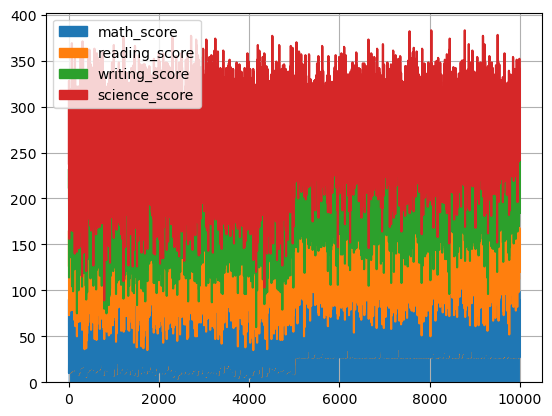

In [ ]:
df2.plot(kind = 'area', grid = True )